# A JOURNEY TO TORONTO AND NYC
### Exploring Toronto, Canada and Queens NYC, USA
- Combine and merge neighborhood data
- Combine and merge venues data
- Prepare data for Clustering and Segmentation
- Apply K-Means algorithm
- Show clusters one map

In [11]:
import numpy as np # liquary to handle data in a vectorized quner

import pandas as pd # liquary for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib as plt
%matplotlib inline

import json # liquary to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # liquary to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering liquary

print('Liquaries imported.')

Liquaries imported.


#### Load venues data

In [12]:
toronto_venues = pd.read_csv('toronto_venues.csv')
print(toronto_venues.shape)
toronto_venues.head()

(1620, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop


In [13]:
queens_venues = pd.read_csv('queens_venues.csv')
print(queens_venues.shape)
queens_venues.head()

(2092, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop


#### Merge venues data

In [14]:
qu_tor_venues = pd.concat([queens_venues, toronto_venues])

In [15]:
print(qu_tor_venues.shape)
qu_tor_venues.head()

(3712, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop


#### Load boroughs data

In [16]:
borough_toronto = pd.read_csv('borough_toronto.csv')
borough_toronto.drop('PostalCode', axis=1, inplace=True)
print(borough_toronto.shape)
borough_toronto.head()

(39, 4)


,Borough,Neighborhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,East Toronto,Studio District,43.659526,-79.340923
4,Central Toronto,Lawrence Park,43.728020,-79.388790


In [17]:
borough_queens = pd.read_csv('borough_queens.csv')
print(borough_queens.shape)
borough_queens.head()

(81, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


#### Merge boroughs data

In [18]:
qu_tor_boroughs = pd.concat([borough_queens, borough_toronto])

In [19]:
qu_tor_boroughs.reset_index(drop=True, inplace=True)
print(qu_tor_boroughs.shape)
qu_tor_boroughs.head()

(120, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [20]:
from geopy.geocoders import Nominatim

address = 'Toronto Canada'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
tor_latitude = location.latitude
tor_longitude = location.longitude

print(f'The geograpical coordinate of Toronto City are {tor_latitude}, {tor_longitude}.')

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


#### Use geopy liquary to get the latitude and longitude values of New York City.

In [21]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# in order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
ny_latitude = location.latitude
ny_longitude = location.longitude

print(f'The geograpical coordinate of New York City are {ny_latitude}, {ny_longitude}.')

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### New York and Toronto Locations

In [39]:
ny_tor_map = folium.Map(
    location=[ny_latitude, ny_longitude],
    zoom_start=6,
    
)


folium.Marker([tor_latitude, tor_longitude], popup='<b>Toronto City</b>').add_to(ny_tor_map)
folium.Marker([ny_latitude, ny_longitude], popup='<b>New York City</b>').add_to(ny_tor_map)

ny_tor_map

![](tor_queens_1.png)

#### Create a map of queens with neighborhoods superimposed on top.

In [24]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print(f'The geograpical coordinate of queens are {latitude}, {longitude}.')

The geograpical coordinate of queens are 40.7498243, -73.7976337.


#### Create a map of queens with neighborhoods superimposed on top.

In [25]:
# create map of queens using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(qu_tor_boroughs['Latitude'], qu_tor_boroughs['Longitude'], qu_tor_boroughs['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

![](queens_4.png)

#### Create a map of Toronto with neighborhoods superimposed on top.

In [26]:
# create map of queens using latitude and longitude values
map_toronto = folium.Map(location=[tor_latitude, tor_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(qu_tor_boroughs['Latitude'], qu_tor_boroughs['Longitude'], qu_tor_boroughs['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

![](tor_6.png)

##### Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [27]:
CLIENT_ID = 'C2XJXBVHYV1HFNHGDBEXEQPWLXRJA3KHJZGX53EQEPHTO5SZ' # your Foursquare ID
CLIENT_SECRET = '02LZ0P3GVPQXG4MTY53Q1NQDF4QU5AWXMRCTBSNHFPL2RFBQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C2XJXBVHYV1HFNHGDBEXEQPWLXRJA3KHJZGX53EQEPHTO5SZ
CLIENT_SECRET:02LZ0P3GVPQXG4MTY53Q1NQDF4QU5AWXMRCTBSNHFPL2RFBQ


In [28]:
qu_tor_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,19,19,19,19,19,19
Astoria,99,99,99,99,99,99
Astoria Heights,14,14,14,14,14,14
Auburndale,19,19,19,19,19,19
Bay Terrace,40,40,40,40,40,40
Bayside,76,76,76,76,76,76
Bayswater,1,1,1,1,1,1
Beechhurst,13,13,13,13,13,13
Bellaire,13,13,13,13,13,13


#### Let's find out how quy unique categories can be curated from all the returned venues

In [29]:
print('There are {} uniques categories.'.format(len(qu_tor_venues['Venue Category'].unique())))

There are 333 uniques categories.


## 3. Analyze Each Neighborhood

In [30]:
qu_tor_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop


In [31]:
qu_tor_venues.to_csv('qu_tor_venues.csv', index=False)

In [32]:
qu_tor_venues = pd.read_csv('qu_tor_venues.csv')

####  One hot encoding for 'Venue Category' column and add 'Neighborhood' column in new dataframe

In [33]:
# one hot encoding
qu_tor_onehot = pd.get_dummies(qu_tor_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
qu_tor_onehot['Neighborhood'] = qu_tor_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [qu_tor_onehot.columns[-1]] + list(qu_tor_onehot.columns[:-1])
qu_tor_onehot = qu_tor_onehot[fixed_columns]


qu_tor_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Basketball Court,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Plane,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant

In [34]:
qu_tor_onehot.shape

(3712, 333)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [35]:
qu_tor_grouped = qu_tor_onehot.groupby('Neighborhood').mean().reset_index()
qu_tor_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Basketball Court,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Plane,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant

In [36]:
qu_tor_grouped.shape

(119, 333)

#### Let's print each neighborhood along with the top 5 most common venues

In [37]:
num_top_venues = 5

for hood in qu_tor_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = qu_tor_grouped[qu_tor_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arverne----
            venue  freq
0       Surf Spot  0.21
1  Sandwich Place  0.11
2   Metro Station  0.11
3      Donut Shop  0.05
4     Coffee Shop  0.05


----Astoria----
                       venue  freq
0  Middle Eastern Restaurant  0.06
1                        Bar  0.06
2           Greek Restaurant  0.05
3   Mediterranean Restaurant  0.04
4          Indian Restaurant  0.04


----Astoria Heights----
              venue  freq
0     Bowling Alley  0.07
1  Business Service  0.07
2       Bus Station  0.07
3     Shopping Mall  0.07
4      Burger Joint  0.07


----Auburndale----
                    venue  freq
0      Italian Restaurant  0.11
1    Fast Food Restaurant  0.05
2       Korean Restaurant  0.05
3      Athletics & Sports  0.05
4  Furniture / Home Store  0.05


----Bay Terrace----
                 venue  freq
0       Clothing Store  0.10
1        Women's Store  0.08
2  American Restaurant  0.05
3           Donut Shop  0.05
4           Shoe Store  0.05


----Bayside----
   

4  Fast Food Restaurant  0.06


----Harbourfront East, Union Station, Toronto Islands----
                 venue  freq
0          Coffee Shop  0.12
1             Aquarium  0.05
2                Hotel  0.04
3                 Café  0.04
4  Sporting Goods Shop  0.03


----High Park, The Junction South----
                  venue  freq
0       Thai Restaurant  0.08
1    Mexican Restaurant  0.08
2                  Café  0.08
3  Fast Food Restaurant  0.04
4                   Bar  0.04


----Hillcrest----
                       venue  freq
0  College Academic Building  0.11
1                 Donut Shop  0.11
2             Ice Cream Shop  0.05
3                   Tea Room  0.05
4          College Cafeteria  0.05


----Hollis----
                venue  freq
0       Shopping Mall  0.13
1      Baseball Field  0.13
2              Lounge  0.07
3      Sandwich Place  0.07
4  Chinese Restaurant  0.07


----Holliswood----
               venue  freq
0  Mobile Phone Shop   0.2
1     Sandwich Place   0.2

           venue  freq
0    Coffee Shop  0.09
1           Café  0.05
2          Hotel  0.04
3     Restaurant  0.04
4  Deli / Bodega  0.03


----Ridgewood----
               venue  freq
0      Deli / Bodega  0.05
1      Grocery Store  0.05
2  Mobile Phone Shop  0.05
3        Pizza Place  0.05
4               Café  0.05


----Rochdale----
                             venue  freq
0  Southern / Soul Food Restaurant  0.15
1                           Market  0.15
2                             Bank  0.08
3                       Donut Shop  0.08
4                   Breakfast Spot  0.08


----Rockaway Beach----
                  venue  freq
0                 Beach  0.16
1         Deli / Bodega  0.06
2        Ice Cream Shop  0.06
3  Fast Food Restaurant  0.04
4    Seafood Restaurant  0.04


----Rockaway Park----
               venue  freq
0              Beach  0.24
1         Donut Shop  0.08
2        Pizza Place  0.08
3  French Restaurant  0.04
4         Board Shop  0.04


----Rosedale----
     

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = qu_tor_grouped['Neighborhood']

for ind in np.arange(qu_tor_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(qu_tor_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Surf Spot,Metro Station,Sandwich Place,Coffee Shop,Pizza Place,Beach,Donut Shop,Bus Stop,Café,Restaurant
1,Astoria,Middle Eastern Restaurant,Bar,Greek Restaurant,Indian Restaurant,Mediterranean Restaurant,Pizza Place,Seafood Restaurant,Hookah Bar,Bakery,Food Truck
2,Astoria Heights,Hostel,Gourmet Shop,Playground,Plaza,Business Service,Bus Station,Burger Joint,Shopping Mall,Bowling Alley,Supermarket
3,Auburndale,Italian Restaurant,Furniture / Home Store,Mobile Phone Shop,Korean Restaurant,Bar,Toy / Game Store,Discount Store,Supermarket,Train,American Restaurant
4,Bay Terrace,Clothing Store,Women's Store,Donut Shop,Kids Store,Lingerie Store,American Restaurant,Mobile Phone Shop,Shoe Store,Cosmetics Shop,Movie Theater


## 4. Cluster Neighborhoods

In [40]:
qu_tor_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Basketball Court,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Plane,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant

In [41]:
qu_tor_grouped_clustering = qu_tor_grouped.iloc[:,1:]

In [42]:
X = qu_tor_grouped_clustering.values

In [44]:
sum_of_squared_distances = []
K = range(1,80)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 

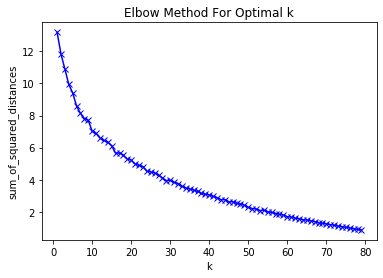

In [47]:
import matplotlib.pyplot as plt

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

In [46]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,80)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k, random_state=0).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 

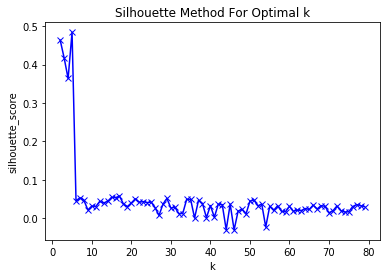

In [48]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

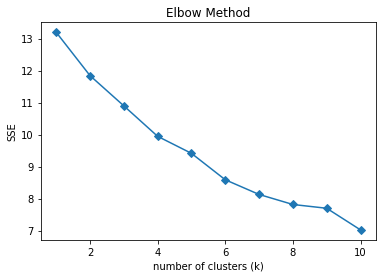

In [49]:
# Using Elbow method to find optimal k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

    
plt.plot(range(1,11), sse, marker='D') 
plt.title('Elbow Method')
plt.xlabel('number of clusters (k)')
plt.ylabel('SSE')
plt.show()

In [50]:
from sklearn.metrics import silhouette_score

for i in range(2,11):    
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    preds = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(i, score))

For n_clusters = 2, silhouette score is 0.46348060628401294)
For n_clusters = 3, silhouette score is 0.41728918129439385)
For n_clusters = 4, silhouette score is 0.3638321989663048)
For n_clusters = 5, silhouette score is 0.48416232394750697)
For n_clusters = 6, silhouette score is 0.045637221237597975)
For n_clusters = 7, silhouette score is 0.05351408901626349)
For n_clusters = 8, silhouette score is 0.046830226941848095)
For n_clusters = 9, silhouette score is 0.02176167191987049)
For n_clusters = 10, silhouette score is 0.03203817103315095)


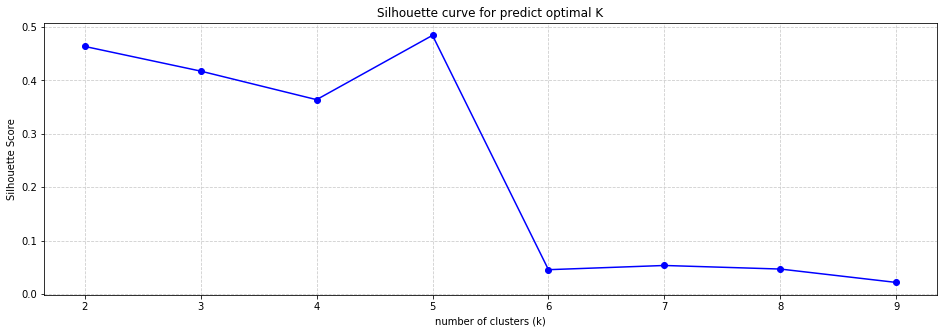

In [51]:
from sklearn.metrics import silhouette_score


kmeans_per_k = [KMeans(n_clusters=k, init='k-means++', random_state=0).fit(X) for k in range(1, 10)]

silh_scores=[silhouette_score(X, model.labels_)
            for model in kmeans_per_k[1:]]
silh_scores

# Plot the silhouette scores graph

plt.rcParams['figure.figsize'] = 16, 5

plt.plot(range(2, 10), silh_scores, 'bo-', label='Silhouette curve')
plt.title('Silhouette curve for predict optimal K')
plt.xlabel('number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(which='major', color='#cccccc', linestyle='--')

plt.show()

Run *k*-means to cluster the neighborhood into 5 clusters.

In [52]:
# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(qu_tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
# first 10
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [53]:
# Number of values predicted for the 5 clusters
kmeans.labels_.shape

(119,)

In [54]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Surf Spot,Metro Station,Sandwich Place,Coffee Shop,Pizza Place,Beach,Donut Shop,Bus Stop,Café,Restaurant
1,Astoria,Middle Eastern Restaurant,Bar,Greek Restaurant,Indian Restaurant,Mediterranean Restaurant,Pizza Place,Seafood Restaurant,Hookah Bar,Bakery,Food Truck
2,Astoria Heights,Hostel,Gourmet Shop,Playground,Plaza,Business Service,Bus Station,Burger Joint,Shopping Mall,Bowling Alley,Supermarket
3,Auburndale,Italian Restaurant,Furniture / Home Store,Mobile Phone Shop,Korean Restaurant,Bar,Toy / Game Store,Discount Store,Supermarket,Train,American Restaurant
4,Bay Terrace,Clothing Store,Women's Store,Donut Shop,Kids Store,Lingerie Store,American Restaurant,Mobile Phone Shop,Shoe Store,Cosmetics Shop,Movie Theater


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [55]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

qu_tor_merged = qu_tor_boroughs

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
qu_tor_merged = qu_tor_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

qu_tor_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,0,Middle Eastern Restaurant,Bar,Greek Restaurant,Indian Restaurant,Mediterranean Restaurant,Pizza Place,Seafood Restaurant,Hookah Bar,Bakery,Food Truck
1,Queens,Woodside,40.746349,-73.901842,0,Grocery Store,Thai Restaurant,Bakery,Latin American Restaurant,Filipino Restaurant,American Restaurant,Bar,Pub,Pizza Place,Donut Shop
2,Queens,Jackson Heights,40.751981,-73.882821,0,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Thai Restaurant,Mexican Restaurant,Supermarket,Diner,Kids Store
3,Queens,Elmhurst,40.744049,-73.881656,0,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,South American Restaurant,Vietnamese Restaurant,Bubble Tea Shop,Argentinian Restaurant,Snack Place,Colombian Restaurant,Malay Restaurant
4,Queens,Howard Beach,40.654225,-73.838138,0,Bagel Shop,Italian Restaurant,Bank,Fast Food Restaurant,Sandwich Place,Pharmacy,Diner,Donut Shop,Supermarket,Bar


In [61]:
qu_tor_merged.shape

(120, 15)

Finally, let's visualize the resulting clusters

In [57]:
# create map
map_clusters_tor = folium.Map(location=[tor_latitude, tor_longitude], zoom_start=11) 

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(qu_tor_merged['Latitude'], qu_tor_merged['Longitude'], qu_tor_merged['Neighborhood'], qu_tor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_tor)
       
map_clusters_tor

![](tor_queens_9.png)

In [79]:
# create map
map_clusters_ny = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=11) 

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(qu_tor_merged['Latitude'], qu_tor_merged['Longitude'], qu_tor_merged['Neighborhood'], qu_tor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_ny)
       
map_clusters_ny

![](tor_queens_10.png)

In [63]:
qu_tor_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,0,Middle Eastern Restaurant,Bar,Greek Restaurant,Indian Restaurant,Mediterranean Restaurant,Pizza Place,Seafood Restaurant,Hookah Bar,Bakery,Food Truck
1,Queens,Woodside,40.746349,-73.901842,0,Grocery Store,Thai Restaurant,Bakery,Latin American Restaurant,Filipino Restaurant,American Restaurant,Bar,Pub,Pizza Place,Donut Shop
2,Queens,Jackson Heights,40.751981,-73.882821,0,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Thai Restaurant,Mexican Restaurant,Supermarket,Diner,Kids Store
3,Queens,Elmhurst,40.744049,-73.881656,0,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,South American Restaurant,Vietnamese Restaurant,Bubble Tea Shop,Argentinian Restaurant,Snack Place,Colombian Restaurant,Malay Restaurant
4,Queens,Howard Beach,40.654225,-73.838138,0,Bagel Shop,Italian Restaurant,Bank,Fast Food Restaurant,Sandwich Place,Pharmacy,Diner,Donut Shop,Supermarket,Bar


## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1 (Red)

In [78]:
cluster1 = qu_tor_merged.loc[qu_tor_merged['Cluster Labels'] == 0, qu_tor_merged.columns[[0, 1] + list(range(5, qu_tor_merged.shape[1]))]]
print(cluster1.shape)
cluster1

(113, 12)


,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,Middle Eastern Restaurant,Bar,Greek Restaurant,Indian Restaurant,Mediterranean Restaurant,Pizza Place,Seafood Restaurant,Hookah Bar,Bakery,Food Truck
1,Queens,Woodside,Grocery Store,Thai Restaurant,Bakery,Latin American Restaurant,Filipino Restaurant,American Restaurant,Bar,Pub,Pizza Place,Donut Shop
2,Queens,Jackson Heights,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Thai Restaurant,Mexican Restaurant,Supermarket,Diner,Kids Store
3,Queens,Elmhurst,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,South American Restaurant,Vietnamese Restaurant,Bubble Tea Shop,Argentinian Restaurant,Snack Place,Colombian Restaurant,Malay Restaurant
4,Queens,Howard Beach,Bagel Shop,Italian Restaurant,Bank,Fast Food Restaurant,Sandwich Place,Pharmacy,Diner,Donut Shop,Supermarket,Bar
5,Queens,Corona,Mexican Restaurant,Supermarket,Italian Restaurant,Deli / Bodega,Chinese Restaurant,Church,Sandwich Place,Restaurant,Ice Cream Shop,Park
6,Queens,Forest Hills,Gym / Fitness Center,Gym,Yoga Studio,Pharmacy,Pizza Place,Park,Convenience Store,Thai Restaurant,Liquor Store,Farmers Market
7,Queens,Kew Gardens,Chinese Restaurant,Donut Shop,Pet Store,Pharmacy,Bank,Pizza Place,Indian Restaurant,Cosmetics Shop,Bar,Movie Theater
8,Queens,Richmond Hill,Pizza Place,Lounge,Bank,Latin American Restaurant,Indian Restaurant,Donut Shop,Sandwich Place,Gym / Fitness Center,Spanish Restaurant,Café
9,Queens,Flushing,Hotpot Restaurant,Bakery,Korean Restaurant,Karaoke Bar,Chinese Restaurant,Bubble Tea Shop,Gym,Seafood Restaurant,Spa,Gym / Fitness Center


#### Cluster 2 (Violet)

In [53]:
qu_tor_merged.loc[qu_tor_merged['Cluster Labels'] == 1, qu_tor_merged.columns[[0, 1] + list(range(5, qu_tor_merged.shape[1]))]]

,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
79,Queens,Bayswater,Playground,Women's Store,Eastern European Restaurant,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Dry Cleaner


#### Cluster 3 (Light Blue "Indigo")


In [76]:
qu_tor_merged.loc[qu_tor_merged['Cluster Labels'] == 2, qu_tor_merged.columns[[0, 1] + list(range(5, qu_tor_merged.shape[1]))]]

,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Queens,Somerville,Park,Women's Store,Dumpling Restaurant,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Dry Cleaner
85,Central Toronto,Lawrence Park,Park,Bus Line,Swim School,Women's Store,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Dry Cleaner
89,Central Toronto,"Moore Park, Summerhill East",Park,Trail,Women's Store,Diner,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dosa Place


#### Cluster 4 (Light Green)

In [56]:
qu_tor_merged.loc[qu_tor_merged['Cluster Labels'] == 3, qu_tor_merged.columns[[0, 1] + list(range(5, qu_tor_merged.shape[1]))]]

,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,Queens,Jamaica Estates,Antique Shop,Intersection,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant
103,Central Toronto,Roselawn,Garden,Music Venue,Women's Store,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Dry Cleaner


#### Cluster 5 (Orange)

In [57]:
qu_tor_merged.loc[qu_tor_merged['Cluster Labels'] == 4, qu_tor_merged.columns[[0, 1] + list(range(5, qu_tor_merged.shape[1]))]]

,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
64,Queens,Brookville,Deli / Bodega,Women's Store,Eastern European Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant


#### Observations:

- Cluster 1: (**Red**)
  - 113 neighborhoods
  - Most of the neighborhoods fall into Cluster 1 where the Airport, mostly business areas and Food and Drink Places like restaurants with different cuisines, Café, Supermarkets etc.
- Cluster 2: (**Violet**)
  - 1 neighborhood
  - **Playground**
- Cluster 3: (Light Blue "**Indigo**")
  - 3 neighborhoods
  - Cluster of **Parks** and Dog Run
- Cluster 4: (**Light Green**)
  - 2 neighborhoods
  - **Garden**
- Cluster 5: (**Orange**)
  - 1 neighborhood
  - food and store